このプログラムでは、`試行回数が少ないと結果が信頼できない`というのを確かめます。


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import *

In [2]:
def splitData(results_list):
    result = []
    results = []
    for r in results_list:
        if r == "," or r == "\n":
            results.append(result[:])
            result.clear()
            continue
        result.append(r)
    results.append(result)
    return results

In [3]:
def checkData(results_list):
  for results in results_list:
      for result in results:
        if not(result=="完走" or result=="失敗"):
          raise ValueError("引数として、'完走'か'失敗'、区切りのための','のみしか受け付けていません")

getProb関数では、実験結果から完走率$p(t)$を求める。  
ある試行結果の事象をAとした時、事象Aが起こる確率は、ある試行結果の事象をAから全事象Uで割ったものになる。  
$$ p(t) = {n(A) \over n(U)} $$

In [4]:
def getProb(results_list):
    prob_list = []
    for results in results_list:
        finish_cnt = results.count('完走')
        faild_cnt = results.count('失敗')
        if finish_cnt + faild_cnt != len(results):
            raise ValueError("引数として、'完走'か'失敗'、区切りのための','のみしか受け付けていません")
        prob_list.append(finish_cnt/len(results))
    return prob_list

In [5]:
def plot(prob_list):
    fig, ax = plt.subplots(figsize=(8.0, 6.0))

    ax.bar(range(len(prob_list)), prob_list, width=0.1, edgecolor="black", alpha=1.0)
    
    ax.set_xticks(range(len(prob_list)))
    ax.set_xticklabels(["改良前", "改良後"])
    fig.add_subplot(ax)

    ax.grid(which='major', color='black')
    ax.grid(which='minor', color='gray', linestyle='--')
    ax.tick_params(labelsize=20)
    ax.set_xlabel("試行", fontname='IPAGothic', fontsize=20)
    ax.set_ylabel("完走率", fontname='IPAGothic', fontsize=20)
    ax.set_ylim(0.0, 1.0)
    plt.show()

ここでは、改良前の試行結果が`完走、失敗、失敗、完走、完走`、改良後の試行結果が`完走、完走、完走、完走、完走`  
である時のそれぞれの確率を求める。

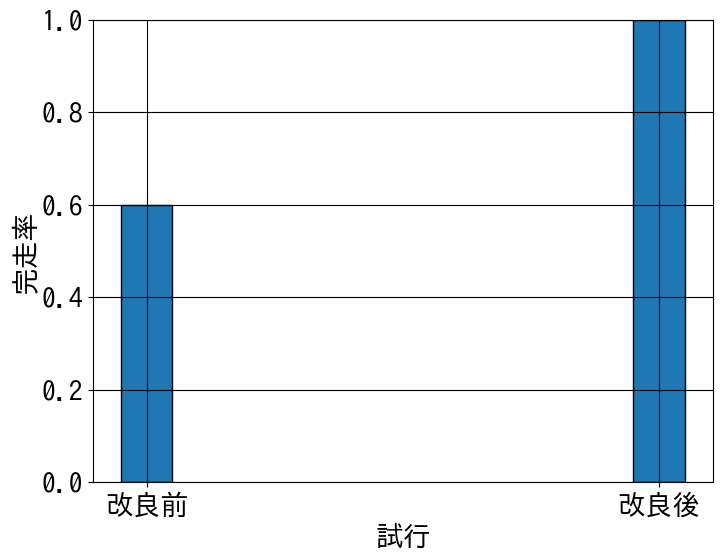

In [6]:
prob_list = []
results_data =["完走", "失敗", "失敗", "完走", "完走", ",",  "完走", "完走", "完走", "完走", "完走"] #改良前、改良後
results_list = splitData(results_data)
try:
  checkData(results_list)
except ValueError as e:
    print(e)
    exit(1)

prob_list = getProb(results_list)

plot(prob_list)

ここでは、前回よりも試行結果を1回分増やした時のそれぞれの確率を求める。
改良前の試行結果として`完走`を1回分追加、改良後の試行結果として`失敗`を1回分追加した時のそれぞれの確率を求める。

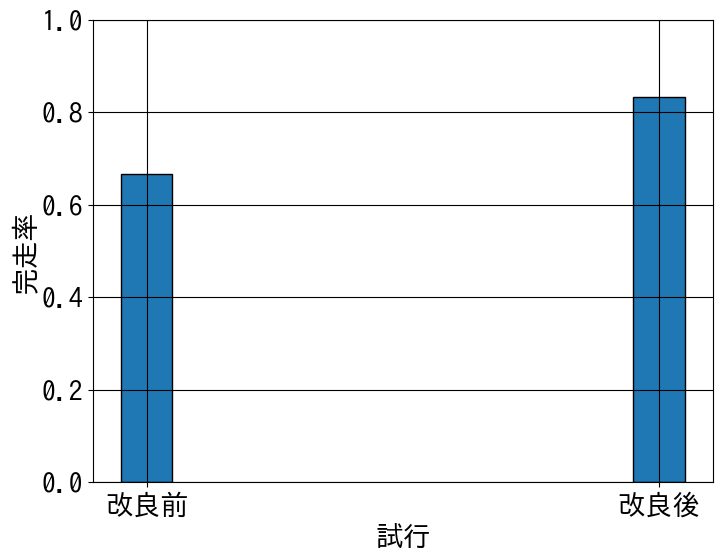

In [7]:
prob_list = []
results_data =["完走", "失敗", "失敗", "完走", "完走", "完走", ",",  "完走", "完走", "完走", "完走", "完走", "失敗"] #改良前、改良後
results_list = splitData(results_data)
try:
  checkData(results_list)
except ValueError as e:
    print(e)
    exit(1)

prob_list = getProb(results_list)

plot(prob_list)

出力された2つのグラフを見ると、試行結果が一つ増えただけで、確率として0.4差があったものが0.1になった。
このことから、より試行結果を増やし完走率を求める必要があると考えられる。
